In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
f1=pd.read_csv("fund_allocations.csv")
f2=pd.read_csv("fund_config.csv")
f3=pd.read_csv("fund_ratios.csv")
f4=pd.read_csv("fund_specs.csv")
f5=pd.read_csv("other_specs.csv")
f6=pd.read_csv("return_3year.csv")
f7=pd.read_csv("return_5year.csv")
f8=pd.read_csv("return_10year.csv")
f9=pd.read_csv("bond_ratings.csv")
f10=pd.read_csv("sample_submission.csv")

f1

,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation
0,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,67922,0.00,0.00
1,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,134783,0.39,17.38
2,4.70,16.40,11.45,25.09,8.36,0.00,9.42,16.47,1.03,61271,0.00,7.09
3,6.53,13.80,10.91,0.16,2.22,6.79,25.73,9.00,0.00,64412,19.42,5.43
4,3.49,13.95,10.51,19.26,3.75,5.11,7.29,12.22,10.41,184058,3.07,10.95
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,6.53,21.00,7.42,10.67,3.00,9.73,7.12,13.92,4.59,142001,7.06,8.96
24996,3.70,18.83,10.10,19.32,3.40,5.80,8.83,10.97,4.75,40598,2.40,11.90
24997,1.17,8.71,14.03,6.89,5.52,8.91,2.49,4.84,28.24,202562,12.64,6.56
24998,2.21,19.92,12.55,14.62,0.00,0.00,3.27,25.31,0.00,144818,0.00,22.12


In [22]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
portfolio_communication_allocation        24886 non-null float64
portfolio_financial_services              24886 non-null float64
portfolio_industrials_allocation          24886 non-null float64
portfolio_tech_allocation                 24886 non-null float64
portfolio_materials_basic_allocation      24886 non-null float64
portfolio_energy_allocation               24886 non-null float64
portfolio_consumer_defence_allocation     24886 non-null float64
portfolio_healthcare_allocation           24886 non-null float64
portfolio_property_allocation             24886 non-null float64
id                                        25000 non-null int64
portfolio_utils_allocation                24886 non-null float64
portfolio_cyclical_consumer_allocation    24886 non-null float64
dtypes: float64(11), int64(1)
memory usage: 2.3 MB


In [24]:
f1.describe()

,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation
count,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,25000.000000,24886.000000,24886.000000
mean,2.272270,11.838126,9.055996,12.780061,3.898250,5.826646,5.111333,8.536916,4.926447,139878.934640,2.761792,9.211606
std,4.404629,12.286453,10.170428,12.558221,8.136322,13.687201,6.078521,9.618490,13.855415,65731.287074,7.594429,9.700984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26000.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83021.750000,0.000000,0.000000
50%,1.180000,13.120000,9.570000,12.885000,2.790000,3.380000,4.840000,9.370000,1.550000,139881.500000,0.430000,10.460000
75%,3.410000,17.910000,12.750000,19.650000,5.060000,6.250000,7.880000,13.560000,4.440000,196759.250000,3.340000,13.210000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,253763.000000,100.000000,100.000000


In [12]:
f1[f1.portfolio_communication_allocation.isnull()==True].id

52        93608
136       58373
241       64502
263      111554
342       93527
          ...  
24015    152234
24132    111545
24247    240515
24345    185723
24398    177632
Name: id, Length: 114, dtype: int64

In [34]:
f1.id.unique().size

25000

In [62]:
f1t=f1.loc[:,f1.columns!='id']

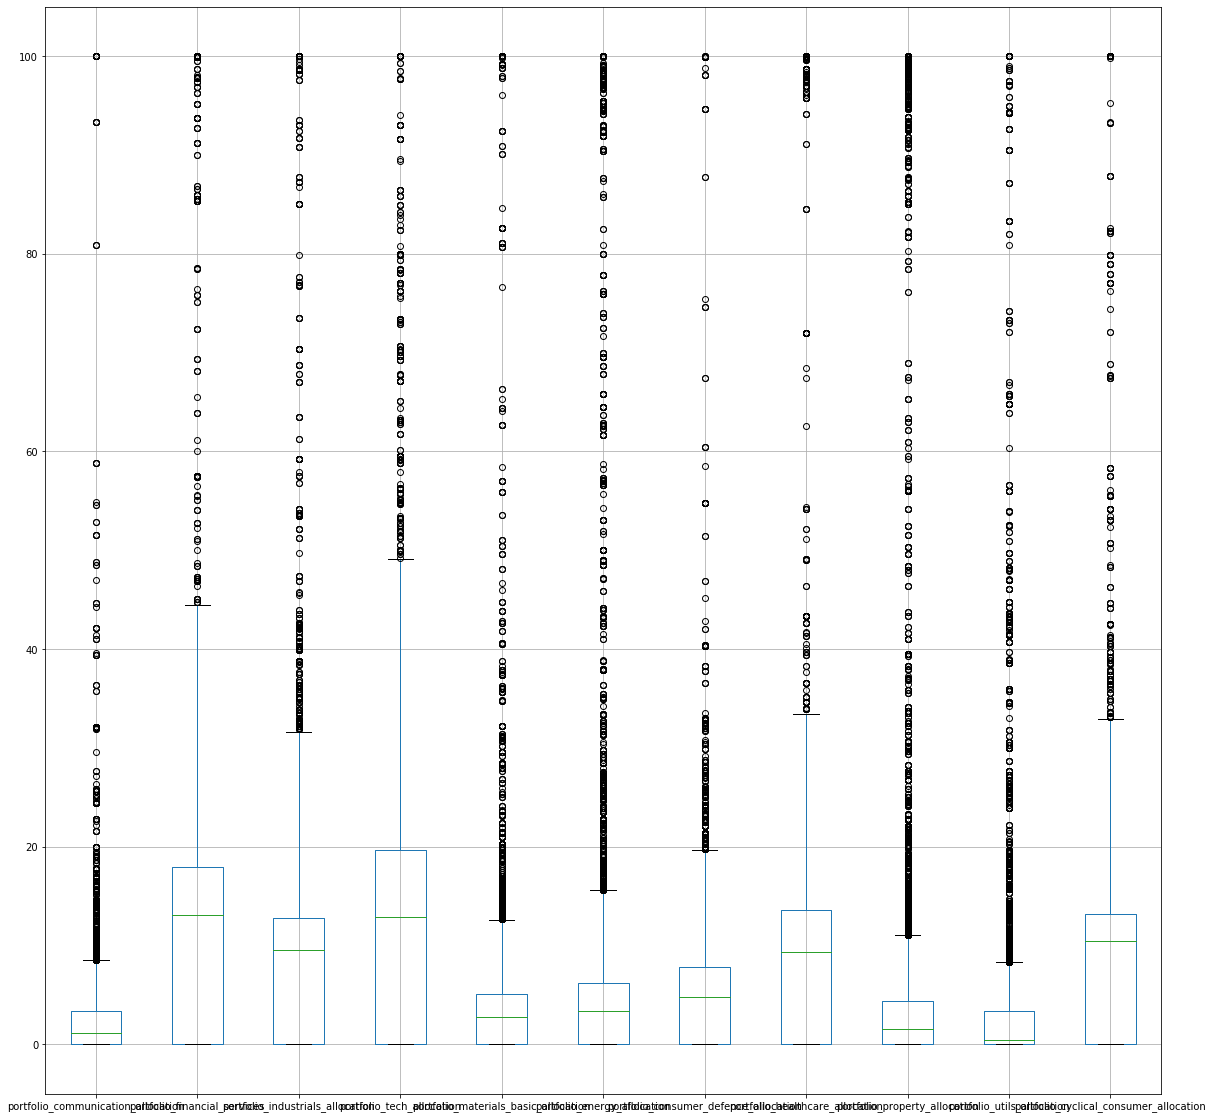

In [63]:
cor1=f1.corr()
plt.figure(figsize=(20,20))
f1t.boxplot(figsize=(20,20))

In [64]:
for columns in f1.columns[:-1]:
    q1 = f1[columns].quantile(0.25)
    q3 = f1[columns].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    f1.loc[(f1[columns] < low) | (f1[columns] > high), columns] = f1[columns].median()

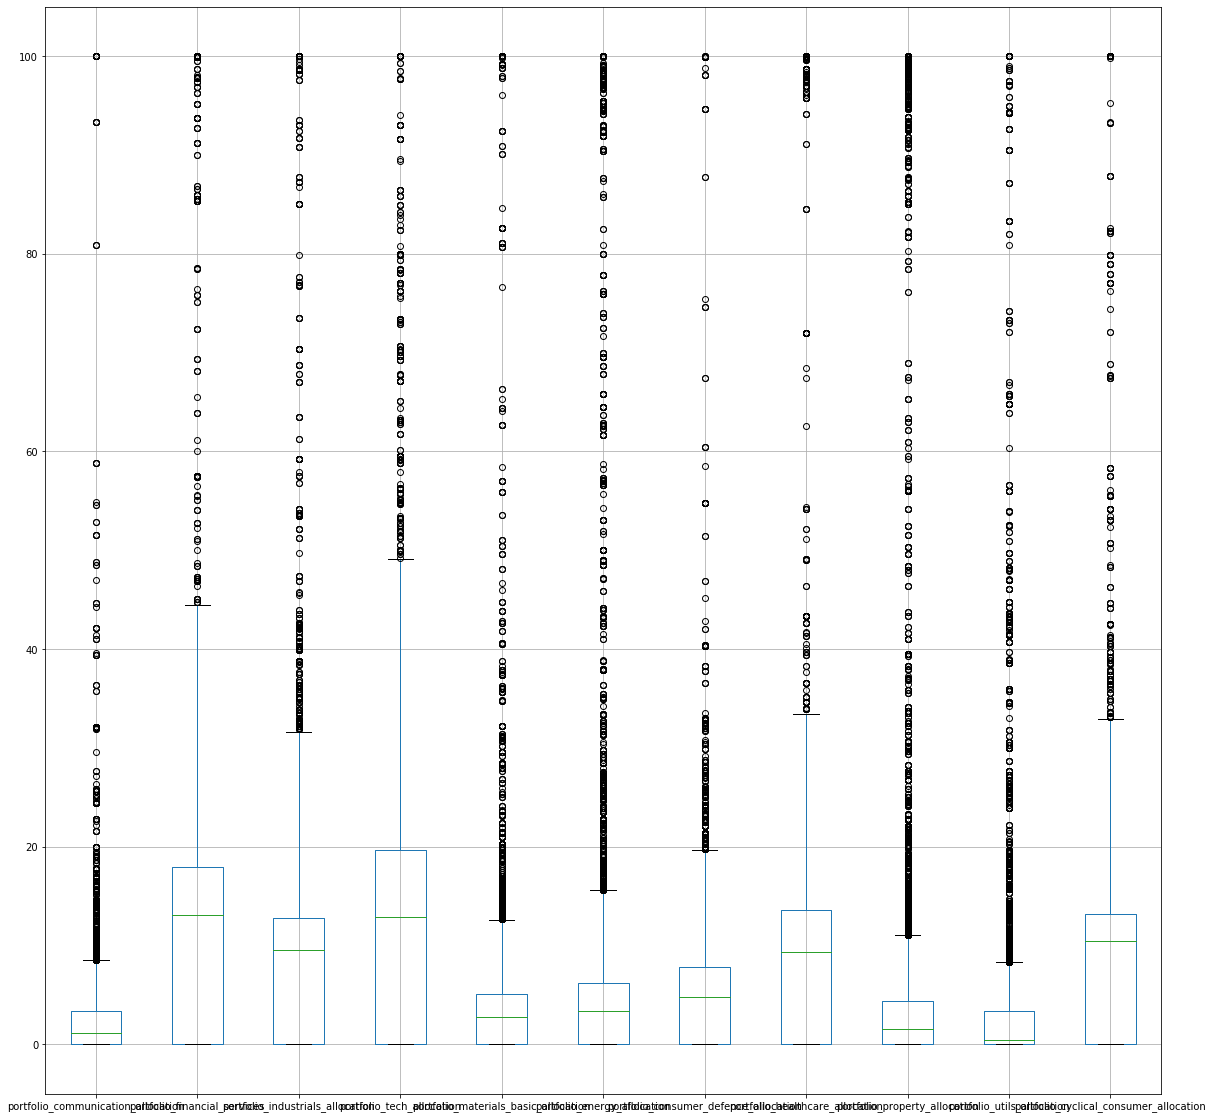

In [65]:
cor1=f1.corr()
plt.figure(figsize=(20,20))
f1t.boxplot(figsize=(20,20))

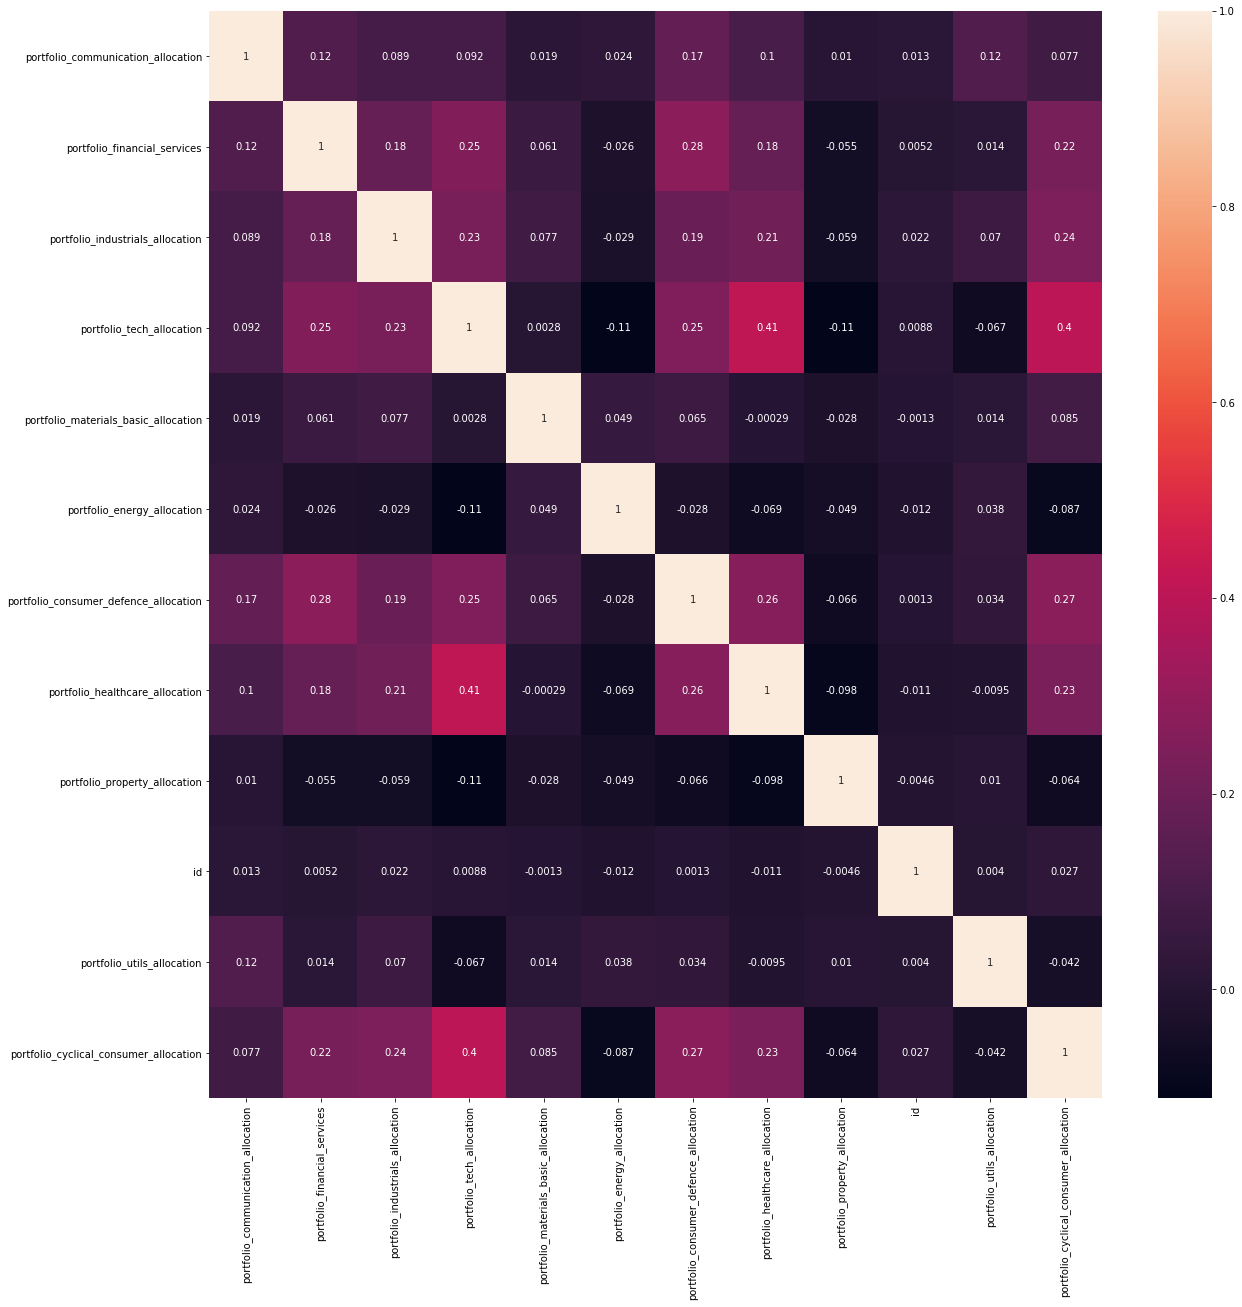

In [7]:
cor1=f1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor1,annot=True)

In [31]:
f2

,category,parent_company,fund_id,fund_name
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...
1,Large Growth,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N
2,Large Growth,Calvert Research and Management,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,Calvert Equity Fund Class A
3,Large Value,Invesco,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,Invesco Diversified Dividend Fund R5 Class
4,Target-Date 2035,PGIM Funds (Prudential),63d8406d-c525-494a-8e03-d4fc4cfcb571,Prudential Day One 2035 Fund Class R3
...,...,...,...,...
24995,Large Value,Federated,c3d73c76-6b0c-4ee4-b562-e9bff53e4c8c,"Federated Equity Income Fund, Inc. Class A Shares"
24996,World Large Stock,AllianceBernstein,12fc8949-6563-4dd4-a7cc-0400131fa6ab,AB Tax-Managed Wealth Appreciation Strategy Cl...
24997,Allocation - 30% to 50% Equity,OppenheimerFunds,7fe4b63a-c42e-4c2b-a59b-d29ade57ecfd,Oppenheimer Global Multi-Asset Income Fund Cla...
24998,Mid-Cap Blend,Miller Value Funds,65421547-1407-4c50-92dc-e1cb1e9972dd,Miller Opportunity Trust Class I


In [25]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
category          25000 non-null object
parent_company    25000 non-null object
fund_id           25000 non-null object
fund_name         25000 non-null object
dtypes: object(4)
memory usage: 781.4+ KB


In [26]:
f2.describe()

,category,parent_company,fund_id,fund_name
count,25000,25000,25000,25000
unique,111,761,25000,24958
top,Large Growth,Fidelity Investments,7217efbe-3100-457f-b4e8-2ced0b9080d6,Calamos Investment Trust - Calamos Focus Growt...
freq,1335,966,1,4


In [25]:
enc=LabelEncoder()
f2.category=enc.fit_transform(f2.category)
f2

,category,parent_company,fund_id,fund_name
0,19,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...
1,42,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N
2,42,Calvert Research and Management,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,Calvert Equity Fund Class A
3,43,Invesco,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,Invesco Diversified Dividend Fund R5 Class
4,90,PGIM Funds (Prudential),63d8406d-c525-494a-8e03-d4fc4cfcb571,Prudential Day One 2035 Fund Class R3
...,...,...,...,...
24995,43,Federated,c3d73c76-6b0c-4ee4-b562-e9bff53e4c8c,"Federated Equity Income Fund, Inc. Class A Shares"
24996,109,AllianceBernstein,12fc8949-6563-4dd4-a7cc-0400131fa6ab,AB Tax-Managed Wealth Appreciation Strategy Cl...
24997,1,OppenheimerFunds,7fe4b63a-c42e-4c2b-a59b-d29ade57ecfd,Oppenheimer Global Multi-Asset Income Fund Cla...
24998,51,Miller Value Funds,65421547-1407-4c50-92dc-e1cb1e9972dd,Miller Opportunity Trust Class I


In [26]:
f2.describe()

,category
count,25000.000000
mean,53.160920
std,31.103076
min,0.000000
25%,32.000000
50%,47.000000
75%,81.000000
max,110.000000


In [9]:
f2.isnull().sum()

category          0
parent_company    0
fund_id           0
fund_name         0
dtype: int64

In [14]:
f3

,fund_id,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio
0,264614c6-5ac3-4146-ba26-1674b136cb40,67922,1.44,1.71,1.31,"19,857.41",5.91,14.51
1,f5ad58c2-fdea-4087-8678-e04744f89f90,134783,0.58,5.30,3.38,"72,347.03",15.95,18.88
2,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,61271,0.99,5.40,3.67,"68,857.43",15.97,23.27
3,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,64412,0.52,2.23,1.63,"43,266.62",8.93,12.7
4,63d8406d-c525-494a-8e03-d4fc4cfcb571,184058,0.75,2.02,1.4,"43,747.9",7.59,14.74
...,...,...,...,...,...,...,...,...
24995,c3d73c76-6b0c-4ee4-b562-e9bff53e4c8c,142001,1.12,1.78,1.11,"45,619.69",8.64,11.3
24996,12fc8949-6563-4dd4-a7cc-0400131fa6ab,40598,1.02,1.94,1.36,"37,550.75",7.61,14.3
24997,7fe4b63a-c42e-4c2b-a59b-d29ade57ecfd,202562,0.95,1.52,1.5,"7,378.47",4.63,14.49
24998,65421547-1407-4c50-92dc-e1cb1e9972dd,144818,1.10,0.98,0.86,"14,859.2",3.8,7.89


In [14]:
f3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
fund_id                          25000 non-null object
tag                              25000 non-null int64
fund_ratio_net_annual_expense    25000 non-null float64
pb_ratio                         24886 non-null float64
ps_ratio                         24886 non-null object
mmc                              24886 non-null object
pc_ratio                         24886 non-null object
pe_ratio                         24886 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
f3.tag[f3.fund_id==f9]

In [41]:
test=f3.tag[f3.pb_ratio.isnull()==True]
test

52        93608
136       58373
241       64502
263      111554
342       93527
          ...  
24015    152234
24132    111545
24247    240515
24345    185723
24398    177632
Name: tag, Length: 114, dtype: int64

In [15]:
f4

,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
0,Value,USD,1.185000e+07,5.57,NaN,2015-02-02,67922,Large,20.19
1,Growth,USD,1.397000e+10,0.42,3.0,2012-05-30,134783,Large,16.79
2,Growth,USD,2.660000e+09,0.02,4.0,1987-08-23,61271,Large,17.13
3,Value,USD,1.957000e+10,2.71,3.0,2005-10-24,64412,Large,11.63
4,Blend,USD,2.847000e+07,2.44,0.0,2016-12-12,184058,Large,10.25
...,...,...,...,...,...,...,...,...,...
24995,Value,USD,9.418100e+08,1.80,1.0,1986-12-29,142001,Large,10.31
24996,Blend,USD,7.090800e+08,1.03,NaN,2003-09-01,40598,Large,11.88
24997,Blend,USD,8.778000e+07,5.08,1.0,2014-11-30,202562,Medium,7.29
24998,Value,USD,1.520000e+09,0.00,NaN,2000-06-25,144818,Medium,13.74


In [36]:
f4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
investment_class     23520 non-null object
currency             25000 non-null object
total_assets         24881 non-null float64
yield                24873 non-null float64
greatstone_rating    20000 non-null float64
inception_date       25000 non-null object
tag                  25000 non-null int64
fund_size            23520 non-null object
return_ytd           24892 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


In [16]:
f4[f4.tag==93608]

,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
52,Growth,USD,1.310000e+09,0.96,0.0,2016-06-06,93608,Large,6.55


In [37]:
f4.describe()

,total_assets,yield,greatstone_rating,tag,return_ytd
count,2.488100e+04,24873.000000,20000.000000,25000.000000,24892.000000
mean,3.476451e+09,1.850446,2.839750,139878.934640,9.288884
std,1.827507e+10,1.804311,1.277439,65731.287074,5.801027
min,1.916000e+04,0.000000,0.000000,26000.000000,-36.300000
25%,9.303000e+07,0.480000,2.000000,83021.750000,4.430000
50%,4.417900e+08,1.650000,3.000000,139881.500000,9.820000
75%,1.620000e+09,2.640000,4.000000,196759.250000,13.080000
max,7.727200e+11,45.360000,5.000000,253763.000000,46.290000


In [39]:
f4.greatstone_rating.isnull().sum()

5000

In [16]:
f5

,2014_category_return,2012_return_category,years_up,2018_return_category,tag,category_return_1year,cash_percent_of_portfolio,pc_ratio,2011_return_category,ytd_return_fund,...,2018_return_fund,2017_return_fund,greatstone_rating,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return
0,NaN,NaN,1.0,-16.32,67922,13.05,1.19,5.91,NaN,20.19,...,-12.23,-3.31,NaN,1.75,-34.98,4.12,0.00,0.00,NaN,NaN
1,10.00,15.34,5.0,-2.09,134783,10.71,0.10,15.95,NaN,16.79,...,-2.62,26.39,3.0,1.06,3.60,2.33,0.00,0.00,NaN,33.92
2,10.00,15.34,26.0,-2.09,61271,10.71,2.00,15.97,-2.46,17.13,...,5.04,25.79,4.0,1.06,3.60,3.77,0.58,0.08,15.53,33.92
3,10.21,14.57,11.0,-8.53,64412,4.48,6.13,8.93,-0.75,11.63,...,-7.54,8.53,3.0,1.00,-4.05,1.46,0.00,0.00,13.66,31.21
4,NaN,NaN,1.0,-7.04,184058,3.17,6.59,7.59,NaN,10.25,...,-7.37,17.52,0.0,0.45,NaN,1.28,24.97,0.02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,10.21,14.57,23.0,-8.53,142001,4.48,0.44,8.64,-0.75,10.31,...,-11.69,16.06,1.0,1.00,-4.05,-0.22,4.01,0.00,13.66,31.21
24996,2.79,15.84,11.0,-9.64,40598,1.85,1.10,7.61,-7.93,11.88,...,-9.89,22.78,NaN,1.11,-1.69,0.85,0.00,0.00,13.74,25.19
24997,NaN,NaN,2.0,-5.04,202562,3.03,11.15,4.63,NaN,7.29,...,-7.61,6.29,1.0,0.79,-2.32,1.23,43.11,4.29,NaN,NaN
24998,7.80,16.15,13.0,-11.15,144818,2.33,0.00,3.8,-3.81,13.74,...,-9.53,26.21,NaN,1.06,-4.75,-4.96,0.00,0.00,22.52,34.10


In [38]:
f5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 43 columns):
2014_category_return                 18817 non-null float64
2012_return_category                 15876 non-null float64
years_up                             23188 non-null float64
2018_return_category                 24191 non-null float64
tag                                  25000 non-null int64
category_return_1year                24885 non-null float64
cash_percent_of_portfolio            24886 non-null float64
pc_ratio                             24886 non-null object
2011_return_category                 14467 non-null float64
ytd_return_fund                      24885 non-null float64
years_down                           23359 non-null float64
2014_return_fund                     17794 non-null float64
category_return_1month               24885 non-null float64
2013_return_fund                     16462 non-null float64
fund_return_3months                  24885 non-null fl

In [44]:
f5.describe()

,2014_category_return,2012_return_category,years_up,2018_return_category,tag,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,...,2018_return_fund,2017_return_fund,greatstone_rating,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return
count,18817.000000,15876.000000,23188.000000,24191.000000,25000.000000,24885.000000,24886.000000,14467.000000,24885.000000,23359.000000,...,24060.000000,22449.000000,20000.000000,25000.000000,20399.000000,24885.000000,24886.000000,24886.000000,13462.000000,17363.000000
mean,4.677046,12.411046,8.419312,-6.486223,139878.934640,2.736506,7.381846,-1.864729,9.289783,3.242519,...,-6.686791,15.156165,2.839750,1.013535,-2.252970,0.961685,30.781998,0.312516,13.155126,16.400532
std,6.225088,5.815421,6.967322,5.420223,65731.287074,5.026465,12.899732,7.191954,5.797707,2.322739,...,6.681542,11.178806,1.277439,0.329003,4.999291,1.694348,38.686645,2.150776,7.659462,15.949795
min,-17.980000,-23.700000,1.000000,-27.270000,26000.000000,-10.920000,0.000000,-35.500000,-36.300000,1.000000,...,-59.100000,-96.220000,0.000000,0.390000,-34.980000,-13.630000,0.000000,0.000000,-28.950000,-48.800000
25%,1.540000,9.010000,3.000000,-9.270000,83021.750000,0.660000,1.240000,-4.070000,4.430000,1.000000,...,-10.520000,6.270000,2.000000,0.810000,-4.010000,0.350000,0.000000,0.000000,8.600000,0.450000
50%,5.040000,14.570000,7.000000,-6.250000,139881.500000,3.070000,3.140000,-2.060000,9.820000,3.000000,...,-5.795000,14.130000,3.000000,1.020000,-1.690000,1.100000,2.170000,0.000000,13.660000,18.580000
75%,9.310000,15.460000,12.000000,-2.090000,196759.250000,4.520000,7.040000,2.010000,13.080000,4.000000,...,-1.620000,21.780000,4.000000,1.180000,-0.260000,1.720000,64.060000,0.010000,15.530000,31.500000
max,44.590000,31.780000,70.000000,7.190000,253763.000000,17.480000,100.000000,32.900000,46.290000,28.000000,...,39.470000,105.730000,5.000000,2.600000,11.970000,15.290000,100.000000,80.870000,41.560000,48.170000


In [17]:
f6

,tag,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category
0,67922,2.46,-7.10,0.18,0.26,0.05,0.45,1.20,54.83,16.25,0.01,4.24,-0.04,0.01,0.00,0.42,7.36
1,134783,12.2,0.07,0.13,1.06,0.13,1.19,1.07,88.46,12.26,0.01,14.39,0.01,0.01,0.01,0.84,15.35
2,61271,17.88,4.32,0.13,1.46,0.13,1.32,0.85,84.41,9.93,0.01,16.42,0.01,0.01,0.01,0.84,15.35
3,64412,7.93,-2.73,0.11,0.68,0.09,0.58,0.70,81.02,8.36,0.01,6.85,-0.02,0.01,0.01,0.84,10.01
4,184058,NaN,NaN,0.08,NaN,0.06,NaN,NaN,NaN,NaN,0.01,0.00,-0.01,0.01,0.01,0.97,9.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,142001,7.25,-4.27,0.11,0.66,0.09,0.71,0.96,88.78,10.88,0.01,8.23,-0.02,0.01,0.01,0.84,10.01
24996,40598,10,2.47,0.11,0.84,0.10,0.79,0.81,77.22,9.74,0.01,9.39,0.03,0.01,0.01,0.73,9.96
24997,202562,3.06,-3.09,0.05,0.47,0.05,0.34,0.89,84.14,5.89,0.01,4.00,-0.01,0.00,0.01,0.88,5.53
24998,144818,6.91,-7.15,0.13,0.61,0.08,1.29,1.77,66.78,23.32,0.01,13.55,-0.04,0.01,0.01,0.81,9.67


In [39]:
f6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
tag                                    25000 non-null int64
3yrs_treynor_ratio_fund                23352 non-null object
3_years_alpha_fund                     23352 non-null float64
3years_category_std                    24894 non-null float64
3yrs_sharpe_ratio_fund                 23352 non-null float64
3yrs_treynor_ratio_category            24894 non-null float64
3_years_return_mean_annual_fund        23352 non-null float64
fund_beta_3years                       23352 non-null float64
3years_fund_r_squared                  23352 non-null float64
3years_fund_std                        23352 non-null float64
category_beta_3years                   24894 non-null float64
fund_return_3years                     24885 non-null float64
3_years_alpha_category                 24894 non-null float64
3_years_return_mean_annual_category    24894 non-null float64
3yrs_sharpe_ratio_category

In [45]:
f6.describe()

,tag,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category
count,25000.000000,23352.000000,24894.000000,23352.000000,24894.000000,23352.000000,23352.000000,23352.000000,23352.000000,24894.000000,24885.000000,24894.000000,24894.000000,24894.000000,24894.000000,24885.000000
mean,139878.934640,-0.577020,0.088854,0.682269,0.069803,0.636231,0.910252,72.558424,9.052961,0.008782,6.999167,-0.004579,0.006514,0.007155,0.716318,7.461773
std,65731.287074,3.379822,0.047886,0.462595,0.068808,0.436049,0.637127,27.191213,5.126264,0.003678,5.460445,0.023468,0.005039,0.004641,0.250938,4.443278
min,26000.000000,-36.240000,0.000000,-4.390000,-0.760000,-3.190000,-39.660000,0.000000,0.180000,-0.010000,-36.020000,-0.120000,-0.020000,-0.010000,0.000000,-19.790000
25%,83021.750000,-2.100000,0.040000,0.440000,0.050000,0.330000,0.770000,64.240000,4.300000,0.010000,2.810000,-0.010000,0.000000,0.000000,0.630000,4.360000
50%,139881.500000,-0.590000,0.090000,0.740000,0.060000,0.620000,0.980000,81.910000,9.660000,0.010000,6.820000,-0.010000,0.010000,0.010000,0.810000,7.440000
75%,196759.250000,0.890000,0.130000,0.970000,0.100000,0.890000,1.140000,92.700000,12.420000,0.010000,10.210000,0.000000,0.010000,0.010000,0.890000,10.010000
max,253763.000000,19.150000,0.330000,4.160000,0.300000,2.980000,22.570000,100.000000,50.490000,0.030000,38.420000,0.110000,0.020000,0.010000,0.970000,21.780000


In [18]:
f7

,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,tag,5_years_return_category
0,0.51,NaN,NaN,NaN,NaN,-0.00,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,67922,-4.25
1,0.86,0.89,0.34,90.11,12.40,0.01,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,134783,11.26
2,0.86,1.15,2.96,89.02,10.28,0.01,0.86,13.84,1.05,0.01,0.10,12.78,-0.00,0.01,0.13,61271,11.26
3,0.86,0.77,-0.50,82.36,8.53,0.01,0.69,9.3,0.62,0.01,0.07,7.25,-0.03,0.01,0.11,64412,7.20
4,0.96,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,0.01,0.04,0.00,-0.01,0.01,0.09,184058,5.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.86,0.37,-5.74,91.42,11.34,0.01,0.97,3.72,0.41,0.01,0.07,4.41,-0.03,0.01,0.11,142001,7.20
24996,0.78,0.53,3.60,82.02,10.39,0.00,0.78,6.55,0.53,0.01,0.06,5.94,0.04,0.01,0.11,40598,5.89
24997,0.89,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,0.00,0.04,0.00,-0.01,0.01,0.06,202562,3.69
24998,0.80,0.37,-8.99,70.32,22.94,0.00,1.72,3.56,0.78,0.01,0.05,6.92,-0.04,0.01,0.13,144818,6.34


In [40]:
f7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
category_r_squared_5years              24894 non-null float64
5yrs_sharpe_ratio_fund                 21157 non-null float64
5_years_alpha_fund                     21157 non-null float64
5years_fund_r_squared                  21157 non-null float64
5years_fund_std                        21157 non-null float64
5yrs_sharpe_ratio_category             24894 non-null float64
5_years_beta_fund                      21157 non-null float64
5yrs_treynor_ratio_fund                21157 non-null object
5_years_return_mean_annual_fund        21157 non-null float64
5_years_return_mean_annual_category    24894 non-null float64
5yrs_treynor_ratio_category            24894 non-null float64
5_years_return_fund                    24885 non-null float64
5_years_alpha_category                 24894 non-null float64
5_years_beta_category                  24894 non-null float64
5years_category_std     

In [46]:
f7.describe()

,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,tag,5_years_return_category
count,24894.000000,21157.000000,21157.000000,21157.000000,21157.000000,24894.000000,21157.000000,21157.000000,24894.000000,24894.000000,24885.000000,24894.000000,24894.000000,24894.000000,25000.000000,24885.000000
mean,0.712750,0.517838,-0.836764,72.452818,9.457442,0.005973,0.897861,0.437478,0.003895,0.040969,4.115030,-0.008121,0.008610,0.093149,139878.934640,4.757312
std,0.260112,0.362550,3.301132,27.494492,5.322416,0.005035,0.642202,0.341248,0.005069,0.044379,4.179389,0.026415,0.004012,0.049600,65731.287074,3.409379
min,0.000000,-5.140000,-34.570000,0.000000,0.170000,-0.010000,-38.850000,-2.960000,-0.010000,-0.160000,-32.750000,-0.180000,-0.020000,0.000000,26000.000000,-17.000000
25%,0.640000,0.330000,-2.120000,64.260000,4.670000,0.000000,0.770000,0.230000,0.000000,0.020000,1.230000,-0.020000,0.010000,0.050000,83021.750000,2.610000
50%,0.830000,0.550000,-0.490000,82.360000,10.340000,0.010000,0.970000,0.410000,0.000000,0.040000,3.740000,0.000000,0.010000,0.100000,139881.500000,4.230000
75%,0.890000,0.730000,0.700000,92.520000,12.830000,0.010000,1.100000,0.630000,0.010000,0.070000,6.520000,-0.000000,0.010000,0.130000,196759.250000,6.410000
max,0.970000,3.220000,15.050000,100.000000,56.670000,0.010000,24.720000,2.490000,0.010000,0.320000,29.290000,0.080000,0.030000,0.360000,253763.000000,15.260000


In [19]:
f8

,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,fund_id,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,0.49,NaN,NaN,NaN,NaN,0.01,NaN,NaN,264614c6-5ac3-4146-ba26-1674b136cb40,0.01,0.21,0.00,0.06,0.01,0.13,NaN,14.30
1,0.88,1.16,0.16,91.68,14.30,0.01,1.08,15.57,f5ad58c2-fdea-4087-8678-e04744f89f90,0.01,0.15,17.25,-0.01,0.01,0.14,1.42,15.94
2,0.88,1.22,1.00,90.69,12.68,0.01,0.95,16.58,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,0.01,0.15,16.21,-0.01,0.01,0.14,1.33,15.94
3,0.90,1.20,0.75,89.03,11.21,0.01,0.84,16.38,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,0.01,0.14,14.12,-0.02,0.01,0.13,1.16,13.68
4,0.97,NaN,NaN,NaN,NaN,0.01,NaN,NaN,63d8406d-c525-494a-8e03-d4fc4cfcb571,0.01,0.08,0.00,-0.02,0.01,0.12,NaN,11.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.90,0.90,-3.02,91.88,12.11,0.01,0.92,11.7,c3d73c76-6b0c-4ee4-b562-e9bff53e4c8c,0.01,0.14,11.16,-0.02,0.01,0.13,0.95,13.68
24996,0.84,0.80,3.36,87.68,13.78,0.01,0.82,12.87,12fc8949-6563-4dd4-a7cc-0400131fa6ab,0.01,0.14,10.99,0.04,0.01,0.14,0.95,11.79
24997,0.91,NaN,NaN,NaN,NaN,0.01,NaN,NaN,7fe4b63a-c42e-4c2b-a59b-d29ade57ecfd,0.01,0.10,0.00,0.00,0.01,0.07,NaN,7.87
24998,0.85,0.80,-5.58,72.16,25.01,0.01,1.67,10.86,65421547-1407-4c50-92dc-e1cb1e9972dd,0.01,0.13,18.64,-0.03,0.01,0.15,1.69,14.51


In [41]:
f8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
10years_category_r_squared              24894 non-null float64
10yrs_sharpe_ratio_fund                 16416 non-null float64
10_years_alpha_fund                     16416 non-null float64
10years_fund_r_squared                  16416 non-null float64
10years_fund_std                        16416 non-null float64
10yrs_sharpe_ratio_category             24894 non-null float64
10_years_beta_fund                      16416 non-null float64
10yrs_treynor_ratio_fund                16416 non-null object
fund_id                                 25000 non-null object
10_years_return_mean_annual_category    24894 non-null float64
10yrs_treynor_ratio_category            24894 non-null float64
10_years_return_fund                    24885 non-null float64
10_years_alpha_category                 24894 non-null float64
10_years_beta_category                  24894 non-null float64
10years_cat

In [47]:
f8.describe()

,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
count,24894.000000,16416.000000,16416.000000,16416.000000,16416.000000,24894.000000,16416.000000,24894.000000,24894.000000,24885.000000,24894.000000,24894.000000,24894.000000,16416.000000,24885.000000
mean,0.731577,0.937495,-0.003148,76.602789,11.418634,0.009511,0.963222,0.007681,0.138839,6.620979,0.001136,0.009076,0.109399,0.858579,9.679289
std,0.273684,0.342270,3.275580,25.699176,5.937141,0.002254,1.582636,0.004514,0.442554,6.537417,0.027795,0.005493,0.055202,0.458993,4.926417
min,0.000000,-6.580000,-25.970000,0.000000,0.200000,-0.010000,-88.060000,-0.020000,-0.190000,-38.560000,-0.110000,-0.020000,0.000000,-3.640000,-24.990000
25%,0.710000,0.800000,-1.740000,72.520000,6.140000,0.010000,0.860000,0.010000,0.070000,0.000000,-0.020000,0.010000,0.060000,0.530000,6.440000
50%,0.840000,0.960000,-0.300000,86.080000,12.740000,0.010000,1.010000,0.010000,0.100000,5.900000,0.000000,0.010000,0.120000,0.900000,9.970000
75%,0.920000,1.120000,1.280000,93.770000,15.620000,0.010000,1.130000,0.010000,0.140000,12.380000,0.010000,0.010000,0.150000,1.200000,14.120000
max,0.970000,3.010000,14.860000,100.000000,52.290000,0.010000,49.290000,0.020000,4.680000,40.660000,0.100000,0.120000,0.340000,3.280000,18.720000


In [20]:
f9

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond
0,0.00,0.0,0.00,0.0,NaN,0.00,67922,0.00,0.0,0.00,0.00,NaN
1,0.00,0.0,0.00,0.0,NaN,0.00,134783,0.00,0.0,0.00,0.00,NaN
2,0.00,0.0,0.00,0.0,NaN,0.00,61271,0.00,0.0,0.00,0.00,NaN
3,0.00,0.0,0.00,0.0,NaN,0.00,64412,0.00,0.0,0.00,0.00,NaN
4,0.00,0.0,0.00,0.0,NaN,0.00,184058,0.00,0.0,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.00,0.0,0.00,0.0,NaN,0.00,142001,0.00,0.0,0.00,0.00,NaN
24996,0.00,0.0,0.00,0.0,NaN,0.00,40598,0.00,0.0,0.00,0.00,NaN
24997,24.65,0.0,2.81,4.0,6.85,40.22,202562,3.42,11.7,0.42,12.78,2.74
24998,0.00,0.0,0.00,0.0,NaN,0.00,144818,0.00,0.0,0.00,0.00,NaN


In [42]:
f9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
bb_rating              24886 non-null float64
us_govt_bond_rating    24886 non-null float64
below_b_rating         24886 non-null float64
others_rating          24886 non-null float64
maturity_bond          8093 non-null float64
b_rating               24886 non-null float64
tag                    25000 non-null int64
a_rating               24886 non-null float64
aaa_rating             24886 non-null float64
aa_rating              24886 non-null float64
bbb_rating             24886 non-null float64
duration_bond          9874 non-null float64
dtypes: float64(11), int64(1)
memory usage: 2.3 MB


In [48]:
f9.describe()

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond
count,24886.000000,24886.0,24886.000000,24886.000000,8093.000000,24886.000000,25000.000000,24886.000000,24886.000000,24886.000000,24886.000000,9874.000000
mean,3.473804,0.0,0.827525,1.666769,7.765444,3.234399,139878.934640,5.054436,14.558310,4.209073,6.126260,4.643082
std,8.299747,0.0,2.700019,6.885158,4.148558,9.197164,65731.287074,9.261811,25.636838,11.164511,10.597962,2.267122
min,0.000000,0.0,-0.020000,-68.210000,0.000000,-0.120000,26000.000000,0.000000,-3.150000,-0.190000,0.000000,-3.010000
25%,0.000000,0.0,0.000000,0.000000,5.460000,0.000000,83021.750000,0.000000,0.000000,0.000000,0.000000,3.500000
50%,0.000000,0.0,0.000000,0.000000,7.290000,0.000000,139881.500000,0.000000,0.000000,0.000000,0.000000,4.800000
75%,2.450000,0.0,0.100000,0.330000,8.920000,0.710000,196759.250000,8.340000,18.955000,3.010000,11.390000,5.760000
max,80.470000,0.0,42.300000,100.000000,29.300000,80.680000,253763.000000,72.870000,118.650000,90.220000,98.000000,25.000000


In [21]:
f10

,fund_id,greatstone_rating
0,85a6edf9-db47-490c-981a-168ce90434bb,NaN
1,654dac08-5e5d-4cf0-870e-3167087de7d2,NaN
2,75214019-f876-42a9-a316-328b759ac4ba,NaN
3,1fe8de6d-cd33-489e-a829-211f1f622eed,NaN
4,bd87a7a0-6ca5-4607-a0cf-d396ecd6037a,NaN
...,...,...
4995,cd0a6c98-3d60-4548-a9db-493d80702107,NaN
4996,5a824843-621b-469f-a7d3-bae5b78beece,NaN
4997,acb8601f-bb42-4fe3-9823-c124d38cfc82,NaN
4998,e3f00c88-98d9-4a44-930c-891513652f8a,NaN


In [43]:
f10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
fund_id              5000 non-null object
greatstone_rating    0 non-null float64
dtypes: float64(1), object(1)
memory usage: 78.2+ KB


In [49]:
f10.describe()

,greatstone_rating
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
f10[f1]